In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv(r'C:\Users\Kerry\startup_data.csv')
print(data.shape)
data.head()

(500, 12)


,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


### Logistic Regression

In [2]:
X = data.iloc[:,[3,4,6,7,8]].values
y = data.iloc[:,8].values

In [3]:
y

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
classifier=LogisticRegression(random_state=42, max_iter=100, solver='saga')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='saga')

In [6]:
y_pred=classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Linear Regression

In [7]:
X = data.iloc[:,[3,4,6,7]].values
y = data.iloc[:,4].values

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse **(1/2)
r2_score = regressor.score(X_test, y_test)
print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2_score}")

Mean squared error: 1.45754378191226e-31
R-squared score: 1.0


### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = data[["Market Share (%)", "Revenue (M USD)", "Funding Amount (M USD)", "Profitable", "Employees", "Valuation (M USD)", "Year Founded", "Industry"]]
y = data["Exit Status"]

# Encode categorical variables
label_encoders = {}
for col in ["Region", "Industry", "Exit Status"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
# Define X and y 
X = data[["Revenue (M USD)", "Funding Amount (M USD)", "Profitable", "Employees", "Valuation (M USD)", "Year Founded"]]
y = data["Exit Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 50.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.28      0.31        29
           1       0.11      0.09      0.10        11
           2       0.60      0.68      0.64        60

    accuracy                           0.50       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.47      0.50      0.48       100

Confusion Matrix:
 [[ 8  1 20]
 [ 3  1  7]
 [12  7 41]]


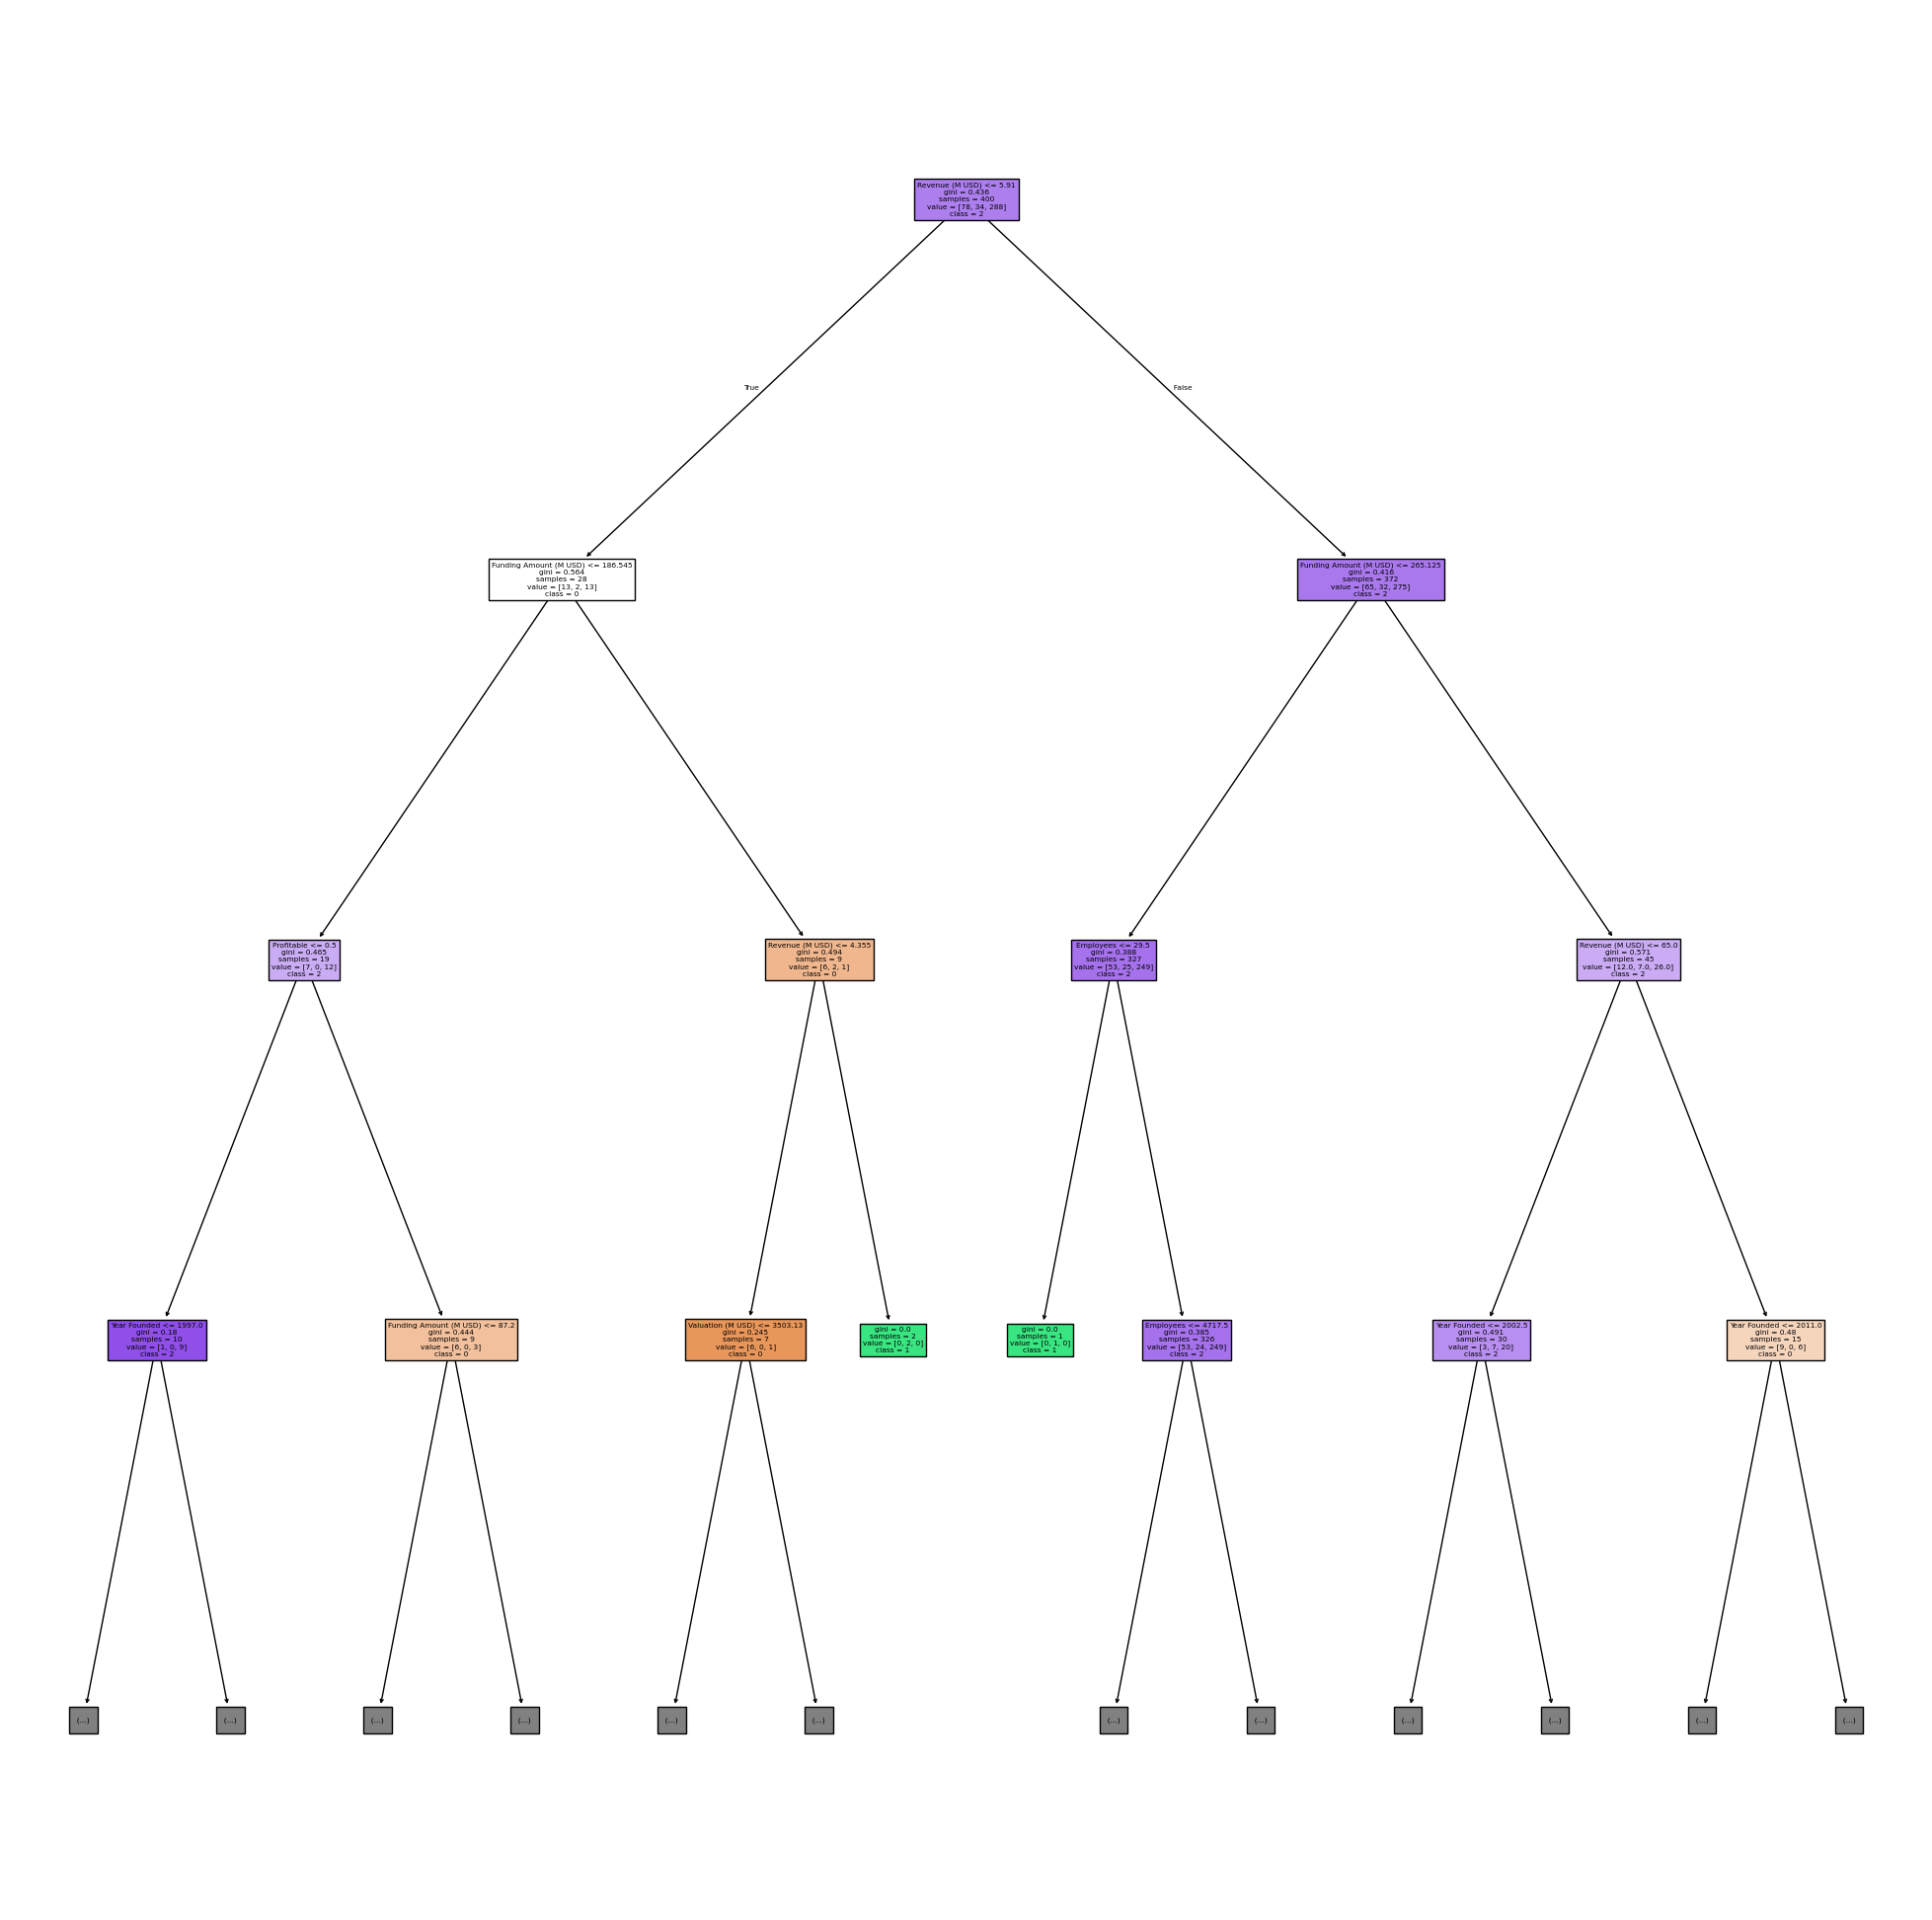

In [11]:
# Visualising the decision tree
plt.figure(figsize=(25, 25))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(c) for c in clf.classes_], filled=True, max_depth=3)
plt.show()

### KNN Algorithm

In [14]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Industry', 'Region', 'Exit Status']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select features and target variable
X = data[['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)', 
        'Employees', 'Market Share (%)', 'Year Founded', 'Industry', 'Region', 'Exit Status']]
y = data['Funding Rounds']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 0.23
